The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
path = pathlib.Path().absolute()
data_path = list(path.glob('**/*.csv'))[0]
data = pd.read_csv(data_path, header=None,names=['A','B','C'])

In [3]:
data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


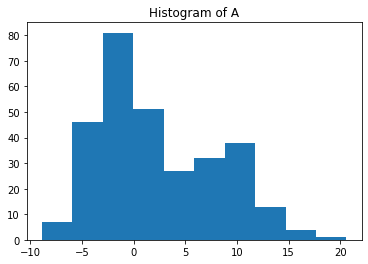

In [4]:
_ = plt.hist(data['A'])
_ = plt.title('Histogram of A')

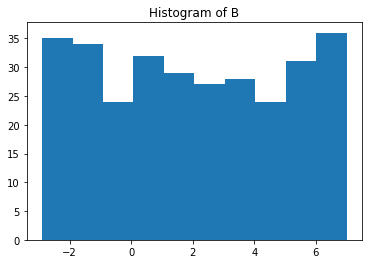

In [5]:
_ = plt.hist(data['B'])
_ = plt.title('Histogram of B')

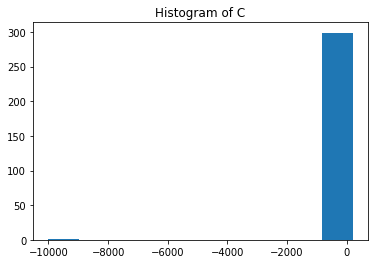

In [6]:
_ = plt.hist(data['C'])
_ = plt.title('Histogram of C')

In [7]:
#remove outlier
data = data[data['C'] > -2000]

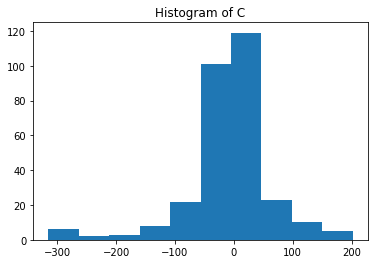

In [8]:
_ = plt.hist(data['C'])
_ = plt.title('Histogram of C')

## Check correlation

In [9]:
# Check correlation
print('Correlation between A and B is',data['A'].corr(data['B'])) # low correlation

Correlation between A and B is -0.18705852516111854


## Visualize

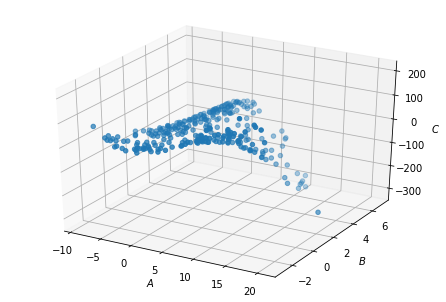

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
_ = ax.scatter(data['A'],data['B'],data['C'])
_ = ax.set_xlabel('$A$')
_ = ax.set_ylabel('$B$')
_ = ax.set_zlabel('$C$')

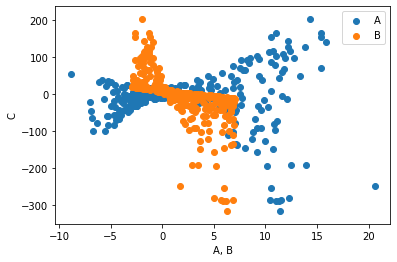

In [11]:
# Plot A vs C; B vs C
plt.scatter(data['A'], data['C'], label = 'A')
plt.scatter(data['B'], data['C'], label = 'B')
_ = plt.xlabel('A, B')
_ = plt.ylabel('C')
_ = plt.legend()

### Notes:
Observed interaction effect from the above scatter plot, so try to add interaction term.

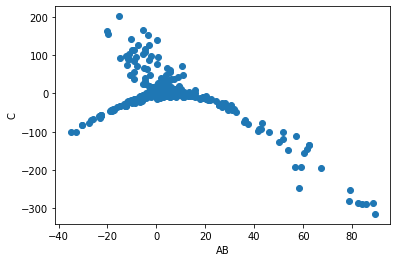

In [14]:
plt.scatter(data['A'] + data['B'] + data['A'] * data['B'], data['C'] )
_ = plt.xlabel('AB')
_ = plt.ylabel('C')

### Notes:
With AB interaction term, seem to have polynomial term.

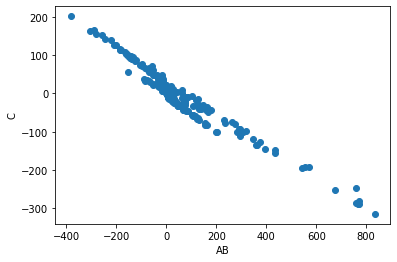

In [17]:
plt.scatter(data['A'] + data['B'] + data['A'] ** 2 *data['B'], data['C'] )
_ = plt.xlabel('AB')
_ = plt.ylabel('C')

### Notes:
Seem linear now.

In [18]:
data['A2B'] = data['A'] ** 2 * data['B'] * 2

# Linear regression (using normal equation)
Since dimension of feature space is small, we can directly use analytical solution to solve the convex optimization problem.

In [19]:
def preprocessing(X, y):
    # train test split 80:20
    X_train = np.array(X.iloc[:240,:])
    y_train = np.array(y[:240])

    # normalize training set
    mean_X = np.mean(X_train,axis = 0)
    std_X = np.std(X_train,axis = 0)
    mean_y = np.mean(y_train,axis = 0)
    std_y = np.std(y_train,axis = 0)
    X_train = (X_train - mean_X) / std_X
    y_train = (y_train - mean_y) / std_y

    # normalize testing using mean and standard deviation from training
    X_test = np.array(X.iloc[240:,:])
    y_test = np.array(y[240:])
    X_test = (X_test - mean_X) / std_X
    y_test = (y_test - mean_y) / std_y

    # add w0
    X_train = np.concatenate([np.ones((X_train.shape[0],1)),X_train],axis =1)
    X_test = np.concatenate([np.ones((X_test.shape[0],1)),X_test],axis =1)
    
    return X_train, y_train, X_test, y_test

In [20]:
X_train, y_train, X_test, y_test = preprocessing(data.iloc[:,:-1], data.iloc[:,-1])

In [21]:
# analytical solution for weights
w = np.linalg.inv((X_train.T @ X_train)) @ X_train.T @ y_train
w

array([-4.68375339e-17,  1.96713265e-01, -1.81643728e-01, -1.08736464e+00,
       -1.05629942e-03])

In [23]:
print('Mean squared error for training is', round(np.mean(((X_train @ w) - y_train) ** 2),5))
print('Mean squared error for testing is', round(np.mean(((X_test @ w) - y_test) ** 2),5))

Mean squared error for training is 3e-05
Mean squared error for testing is 0.00012


In [25]:
def r2(y, y_pred):
    mean_y = np.mean(y,axis = 0)
    sst = sum((y - mean_y) ** 2)
    sse = sum((y - y_pred) ** 2)
    r2 = 1 - (sse / sst)
    return r2

In [28]:
print('R^2 for training is', round(r2(y_train, X_train @ w),5))
print('R^2 for testing is', round(r2(y_test, X_test @ w),5))

R^2 for training is 0.99997
R^2 for testing is 0.99997


## Final Model
$C = w_0 + w_1A + w_2B +w_3A^2B $

$C = -3.81639165e^{-17} + 1.80646721e^{-1}A -1.66844090e^{-1}B -9.20214228e^{-1}A^2B $

In [37]:
pred = np.concatenate([X_train,X_test]) @ w
y = np.concatenate([y_train,y_test])

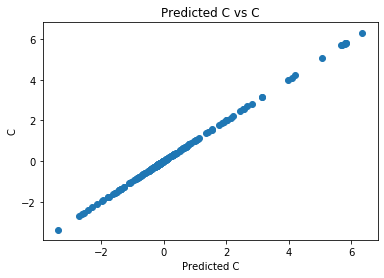

In [42]:
plt.scatter(pred, y)
_ = plt.xlabel('Predicted C')
_ = plt.ylabel('C')
_ = plt.title('Predicted C vs C')